In [1]:
import keras
from keras import layers
import matplotlib.pyplot as plt
import visualkeras
import numpy as np

In [7]:
# Construct the input layer with no definite frame size.
inp = layers.Input(shape=(4, 32,32,3))

# We will construct 3 `ConvLSTM2D` layers with batch normalization,
# followed by a `Conv3D` layer for the spatiotemporal outputs.
x = layers.ConvLSTM2D(filters=64, kernel_size=(5, 5), padding="same", return_sequences=True, activation="relu")(inp)
x = layers.MaxPooling3D((2, 2, 2), padding='same')(x)
#x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(filters=64, kernel_size=(3, 3), padding="same", return_sequences=True, activation="relu")(x)
#x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(filters=64, kernel_size=(1, 1), padding="same", return_sequences=False, activation="relu")(x)
x = layers.Conv2D(filters=1, kernel_size=(3, 3), activation="sigmoid", padding="same")(x)
    
# Next, we will build the complete model and compile it.
model = keras.models.Model(inp, x)
model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam())


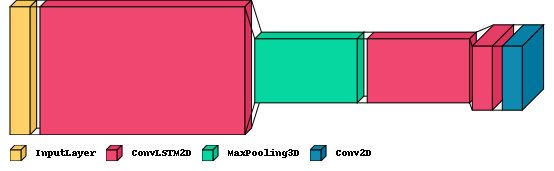

In [8]:
#input_img = keras.Input(shape = (self.batch_len, self.img_shape[:]))

img_shape = (32,32,3)

input_img = keras.Input(shape = (4, img_shape[:]))

x = layers.ConvLSTM2D(64, (3, 3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling3D((2, 2), padding='same')(x)
x = layers.ConvLSTM2D(32, (3, 3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling3D((2, 2), padding='same')(x)
x = layers.ConvLSTM2D(32, (3, 3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling3D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.ConvLSTM2D(32, (3, 3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling3D((2, 2))(x)
x = layers.ConvLSTM2D(32, (3, 3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling3D((2, 2))(x)
x = layers.ConvLSTM2D(64, (3, 3, 3), activation='relu')(x)
x = layers.UpSampling3D((2, 2))(x)
decoded = layers.ConvLSTM2D(self.img_shape[-1], (3, 3, 3), activation='tanh', padding='same')(x)

self.model = keras.Model(input_img, decoded)

#self.model.compile(optimizer=keras.optimizers.Adam(1e-2), loss = 'mse')
self.model.compile(optimizer=keras.optimizers.SGD(1e-1, momentum=3e-2), loss = 'mse')


return self.model

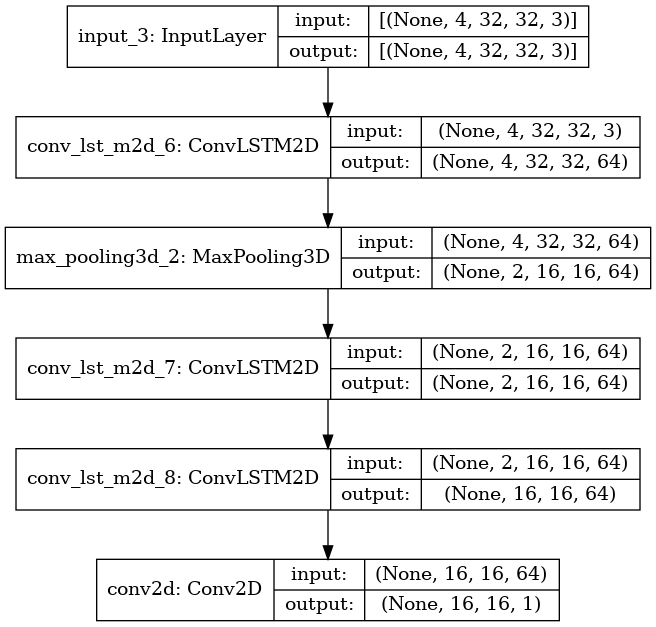

In [9]:
keras.utils.plot_model(model, show_shapes=True)